In [7]:
import os
import re
import csv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter1d
from matplotlib.backends.backend_pdf import PdfPages

sns.color_palette('deep')
sns.set_style('white')

LINEWIDTH = 1.5

workdir = os.getcwd()
path = os.path.relpath('..\\..\\..\\results\\pdfs\\', workdir)
f = os.path.join(path, "validation_results.pdf")

pp = PdfPages(f)

## Validation results

In [8]:
def read_val_file(filename):
    workdir = os.getcwd()
    # path = os.path.relpath('..\\..\\..\\results\\validation_results\\complete_experiments_first\\', workdir)
    path = os.path.relpath('..\\..\\..\\results\\validation_results\\', workdir)
    file = os.path.join(path, filename)

    data = []

    with open(file) as f:
        csvreader = csv.reader(f)
        keys = next(csvreader)

        result = dict.fromkeys(keys)

        first = True

        for row in csvreader:

            if first:
                for key, item in zip(keys, row):
                    if item.isdigit():
                        result[key] = [int(item)]
                    else:
                        try:
                            result[key] = [float(item)]
                        except ValueError:
                            result[key] = [item]
                first = False
            else:
                for key, item in zip(keys, row):
                    if item.isdigit():
                        result[key].append(int(item))
                    else:
                        try:
                            result[key].append(float(item))
                        except ValueError:
                            result[key].append(item)

    return result


## Reward plot

In [9]:
def reward_val(filename, result_dict):
    result = list(result_dict.values())

    fig, axs = plt.subplots(3, 3, figsize=(10, 6), sharey=True, sharex=True)
    fig.suptitle("Validation " + filename, fontsize=16)

    sns.lineplot(data=result[0]['rewards'], linewidth=LINEWIDTH, ax=axs[0, 0])
    lower = np.array(result[0]['rewards']) - np.array(result[0]['rewardsstd'])
    upper = np.array(result[0]['rewards']) + np.array(result[0]['rewardsstd'])
    axs[0, 0].fill_between(range(0, len(lower)), lower, upper, alpha=.3)
    axs[0, 0].set_title(list(result_dict.keys())[0])
    sns.lineplot(data=result[1]['rewards'], linewidth=LINEWIDTH, ax=axs[0, 1])
    lower = np.array(result[1]['rewards']) - np.array(result[1]['rewardsstd'])
    upper = np.array(result[1]['rewards']) + np.array(result[1]['rewardsstd'])
    axs[0, 1].fill_between(range(0, len(lower)), lower, upper, alpha=.3)
    axs[0, 1].set_title(list(result_dict.keys())[1])
    sns.lineplot(data=result[2]['rewards'], linewidth=LINEWIDTH, ax=axs[0, 2])
    lower = np.array(result[2]['rewards']) - np.array(result[2]['rewardsstd'])
    upper = np.array(result[2]['rewards']) + np.array(result[2]['rewardsstd'])
    axs[0, 2].fill_between(range(0, len(lower)), lower, upper, alpha=.3)
    axs[0, 2].set_title(list(result_dict.keys())[2])
    sns.lineplot(data=result[3]['rewards'], linewidth=LINEWIDTH, ax=axs[1, 0])
    lower = np.array(result[3]['rewards']) - np.array(result[3]['rewardsstd'])
    upper = np.array(result[3]['rewards']) + np.array(result[3]['rewardsstd'])
    axs[1, 0].fill_between(range(0, len(lower)), lower, upper, alpha=.3)
    axs[1, 0].set_title(list(result_dict.keys())[3])
    sns.lineplot(data=result[4]['rewards'], linewidth=LINEWIDTH, ax=axs[1, 1])
    lower = np.array(result[4]['rewards']) - np.array(result[4]['rewardsstd'])
    upper = np.array(result[4]['rewards']) + np.array(result[4]['rewardsstd'])
    axs[1, 1].fill_between(range(0, len(lower)), lower, upper, alpha=.3)
    axs[1, 1].set_title(list(result_dict.keys())[4])
    sns.lineplot(data=result[5]['rewards'], linewidth=LINEWIDTH, ax=axs[1, 2])
    lower = np.array(result[5]['rewards']) - np.array(result[5]['rewardsstd'])
    upper = np.array(result[5]['rewards']) + np.array(result[5]['rewardsstd'])
    axs[1, 2].fill_between(range(0, len(lower)), lower, upper, alpha=.3)
    axs[1, 2].set_title(list(result_dict.keys())[5])
    sns.lineplot(data=result[6]['rewards'], linewidth=LINEWIDTH, ax=axs[2, 0])
    lower = np.array(result[6]['rewards']) - np.array(result[6]['rewardsstd'])
    upper = np.array(result[6]['rewards']) + np.array(result[6]['rewardsstd'])
    axs[2, 0].fill_between(range(0, len(lower)), lower, upper, alpha=.3)
    axs[2, 0].set_title(list(result_dict.keys())[6])
    sns.lineplot(data=result[7]['rewards'], linewidth=LINEWIDTH, ax=axs[2, 1])
    lower = np.array(result[7]['rewards']) - np.array(result[7]['rewardsstd'])
    upper = np.array(result[7]['rewards']) + np.array(result[7]['rewardsstd'])
    axs[2, 1].fill_between(range(0, len(lower)), lower, upper, alpha=.3)
    axs[2, 1].set_title(list(result_dict.keys())[7])
    sns.lineplot(data=result[8]['rewards'], linewidth=LINEWIDTH, ax=axs[2, 2])
    lower = np.array(result[8]['rewards']) - np.array(result[8]['rewardsstd'])
    upper = np.array(result[8]['rewards']) + np.array(result[8]['rewardsstd'])
    axs[2, 2].fill_between(range(0, len(lower)), lower, upper, alpha=.3)
    axs[2, 2].set_title(list(result_dict.keys())[8])


    for ax in axs.flat:
        ax.set(xlabel='Episode', ylabel='Reward')

    # Hide x labels and tick labels for top plots and y ticks for right plots.
    for ax in axs.flat:
        ax.label_outer()

    for ax in axs.flat:
        ax.grid(visible=True, which='major', color='#666666', linestyle='-')
        ax.minorticks_on()
        ax.grid(visible=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

    workdir = os.getcwd()
    path = os.path.relpath('..\\..\\..\\results\\pdfs\\', workdir)
    f = os.path.join(path, filename)
    # plt.savefig(f + ".pdf", bbox_inches="tight")
    pp.savefig(bbox_inches="tight")

    plt.show()


## Action Distribution

In [10]:
def action_val(filename, result):
    actions_dict = {}
    for f in list(result.keys()):
        actions_dict[f] = {'LEFT': result[f]['Left'], 'Lstd': result[f]['Leftstd'], 'RIGHT': result[f]['Right'],
                           'Rstd': result[f]['Rightstd'], 'LNAV': result[f]['LNAV'], 'Lnavstd': result[f]['LNAVstd']}

    actions = list(actions_dict.values())

    fig, axs = plt.subplots(3, 3, figsize=(10, 6), sharey=True, sharex=True)
    fig.suptitle("Validation " + filename, fontsize=16)

    sns.lineplot(x=range(0, len(actions[0]['LEFT'])), y=actions[0]['LEFT'], linewidth=LINEWIDTH, ax=axs[0, 0], label="Left")
    sns.lineplot(x=range(0, len(actions[0]['RIGHT'])), y=actions[0]['RIGHT'], linewidth=LINEWIDTH, ax=axs[0, 0], label="Right")
    sns.lineplot(x=range(0, len(actions[0]['LNAV'])), y=actions[0]['LNAV'], linewidth=LINEWIDTH, ax=axs[0, 0], label="LNAV")
    lower_l = np.array(actions[0]['LEFT']) - np.array(actions[0]['Lstd'])
    upper_l = np.array(actions[0]['LEFT']) + np.array(actions[0]['Lstd'])
    axs[0, 0].fill_between(range(0, len(lower_l)), lower_l, upper_l, alpha=.3, color='lightblue')
    lower_r = np.array(actions[0]['RIGHT']) - np.array(actions[0]['Rstd'])
    upper_r = np.array(actions[0]['RIGHT']) + np.array(actions[0]['Rstd'])
    axs[0, 0].fill_between(range(0, len(lower_r)), lower_r, upper_r, alpha=.3, color='orange')
    lower_v = np.array(actions[0]['LNAV']) - np.array(actions[0]['Lnavstd'])
    upper_v = np.array(actions[0]['LNAV']) + np.array(actions[0]['Lnavstd'])
    axs[0, 0].fill_between(range(0, len(lower_v)), lower_v, upper_v, alpha=.3, color='green')
    axs[0, 0].set_title(list(result.keys())[0])

    sns.lineplot(x=range(0, len(actions[1]['LEFT'])), y=actions[1]['LEFT'], linewidth=LINEWIDTH, ax=axs[0, 1], label="Left")
    sns.lineplot(x=range(0, len(actions[1]['RIGHT'])), y=actions[1]['RIGHT'], linewidth=LINEWIDTH, ax=axs[0, 1], label="Right")
    sns.lineplot(x=range(0, len(actions[1]['LNAV'])), y=actions[1]['LNAV'], linewidth=LINEWIDTH, ax=axs[0, 1], label="LNAV")
    lower_l = np.array(actions[1]['LEFT']) - np.array(actions[1]['Lstd'])
    upper_l = np.array(actions[1]['LEFT']) + np.array(actions[1]['Lstd'])
    axs[0, 1].fill_between(range(0, len(lower_l)), lower_l, upper_l, alpha=.3, color='lightblue')
    lower_r = np.array(actions[1]['RIGHT']) - np.array(actions[1]['Rstd'])
    upper_r = np.array(actions[1]['RIGHT']) + np.array(actions[1]['Rstd'])
    axs[0, 1].fill_between(range(0, len(lower_r)), lower_r, upper_r, alpha=.3, color='orange')
    lower_v = np.array(actions[1]['LNAV']) - np.array(actions[1]['Lnavstd'])
    upper_v = np.array(actions[1]['LNAV']) + np.array(actions[1]['Lnavstd'])
    axs[0, 1].fill_between(range(0, len(lower_v)), lower_v, upper_v, alpha=.3, color='green')
    axs[0, 1].set_title(list(result.keys())[1])

    sns.lineplot(x=range(0, len(actions[2]['LEFT'])), y=actions[2]['LEFT'], linewidth=LINEWIDTH, ax=axs[0, 2], label="Left")
    sns.lineplot(x=range(0, len(actions[2]['RIGHT'])), y=actions[2]['RIGHT'], linewidth=LINEWIDTH, ax=axs[0, 2], label="Right")
    sns.lineplot(x=range(0, len(actions[2]['LNAV'])), y=actions[2]['LNAV'], linewidth=LINEWIDTH, ax=axs[0, 2], label="LNAV")
    lower_l = np.array(actions[2]['LEFT']) - np.array(actions[2]['Lstd'])
    upper_l = np.array(actions[2]['LEFT']) + np.array(actions[2]['Lstd'])
    axs[0, 2].fill_between(range(0, len(lower_l)), lower_l, upper_l, alpha=.3, color='lightblue')
    lower_r = np.array(actions[2]['RIGHT']) - np.array(actions[2]['Rstd'])
    upper_r = np.array(actions[2]['RIGHT']) + np.array(actions[2]['Rstd'])
    axs[0, 2].fill_between(range(0, len(lower_r)), lower_r, upper_r, alpha=.3, color='orange')
    lower_v = np.array(actions[2]['LNAV']) - np.array(actions[2]['Lnavstd'])
    upper_v = np.array(actions[2]['LNAV']) + np.array(actions[2]['Lnavstd'])
    axs[0, 2].fill_between(range(0, len(lower_v)), lower_v, upper_v, alpha=.3, color='green')
    axs[0, 2].set_title(list(result.keys())[2])

    sns.lineplot(x=range(0, len(actions[3]['LEFT'])), y=actions[3]['LEFT'], linewidth=LINEWIDTH, ax=axs[1, 0], label="Left")
    sns.lineplot(x=range(0, len(actions[3]['RIGHT'])), y=actions[3]['RIGHT'], linewidth=LINEWIDTH, ax=axs[1, 0], label="Right")
    sns.lineplot(x=range(0, len(actions[3]['LNAV'])), y=actions[3]['LNAV'], linewidth=LINEWIDTH, ax=axs[1, 0], label="LNAV")
    lower_l = np.array(actions[3]['LEFT']) - np.array(actions[3]['Lstd'])
    upper_l = np.array(actions[3]['LEFT']) + np.array(actions[3]['Lstd'])
    axs[1, 0].fill_between(range(0, len(lower_l)), lower_l, upper_l, alpha=.3, color='lightblue')
    lower_r = np.array(actions[3]['RIGHT']) - np.array(actions[3]['Rstd'])
    upper_r = np.array(actions[3]['RIGHT']) + np.array(actions[3]['Rstd'])
    axs[1, 0].fill_between(range(0, len(lower_r)), lower_r, upper_r, alpha=.3, color='orange')
    lower_v = np.array(actions[3]['LNAV']) - np.array(actions[3]['Lnavstd'])
    upper_v = np.array(actions[3]['LNAV']) + np.array(actions[3]['Lnavstd'])
    axs[1, 0].fill_between(range(0, len(lower_v)), lower_v, upper_v, alpha=.3, color='green')
    axs[1, 0].set_title(list(result.keys())[3])

    sns.lineplot(x=range(0, len(actions[4]['LEFT'])), y=actions[4]['LEFT'], linewidth=LINEWIDTH, ax=axs[1, 1], label="Left")
    sns.lineplot(x=range(0, len(actions[4]['RIGHT'])), y=actions[4]['RIGHT'], linewidth=LINEWIDTH, ax=axs[1, 1], label="Right")
    sns.lineplot(x=range(0, len(actions[4]['LNAV'])), y=actions[4]['LNAV'], linewidth=LINEWIDTH, ax=axs[1, 1], label="LNAV")
    lower_l = np.array(actions[4]['LEFT']) - np.array(actions[4]['Lstd'])
    upper_l = np.array(actions[4]['LEFT']) + np.array(actions[4]['Lstd'])
    axs[1, 1].fill_between(range(0, len(lower_l)), lower_l, upper_l, alpha=.3, color='lightblue')
    lower_r = np.array(actions[4]['RIGHT']) - np.array(actions[4]['Rstd'])
    upper_r = np.array(actions[4]['RIGHT']) + np.array(actions[4]['Rstd'])
    axs[1, 1].fill_between(range(0, len(lower_r)), lower_r, upper_r, alpha=.3, color='orange')
    lower_v = np.array(actions[4]['LNAV']) - np.array(actions[4]['Lnavstd'])
    upper_v = np.array(actions[4]['LNAV']) + np.array(actions[4]['Lnavstd'])
    axs[1, 1].fill_between(range(0, len(lower_v)), lower_v, upper_v, alpha=.3, color='green')
    axs[1, 1].set_title(list(result.keys())[4])

    sns.lineplot(x=range(0, len(actions[5]['LEFT'])), y=actions[5]['LEFT'], linewidth=LINEWIDTH, ax=axs[1, 2], label="Left")
    sns.lineplot(x=range(0, len(actions[5]['RIGHT'])), y=actions[5]['RIGHT'], linewidth=LINEWIDTH, ax=axs[1, 2], label="Right")
    sns.lineplot(x=range(0, len(actions[5]['LNAV'])), y=actions[5]['LNAV'], linewidth=LINEWIDTH, ax=axs[1, 2], label="LNAV")
    lower_l = np.array(actions[5]['LEFT']) - np.array(actions[5]['Lstd'])
    upper_l = np.array(actions[5]['LEFT']) + np.array(actions[5]['Lstd'])
    axs[1, 2].fill_between(range(0, len(lower_l)), lower_l, upper_l, alpha=.3, color='lightblue')
    lower_r = np.array(actions[5]['RIGHT']) - np.array(actions[5]['Rstd'])
    upper_r = np.array(actions[5]['RIGHT']) + np.array(actions[5]['Rstd'])
    axs[1, 2].fill_between(range(0, len(lower_r)), lower_r, upper_r, alpha=.3, color='orange')
    lower_v = np.array(actions[5]['LNAV']) - np.array(actions[5]['Lnavstd'])
    upper_v = np.array(actions[5]['LNAV']) + np.array(actions[5]['Lnavstd'])
    axs[1, 2].fill_between(range(0, len(lower_v)), lower_v, upper_v, alpha=.3, color='green')
    axs[1, 2].set_title(list(result.keys())[5])

    sns.lineplot(x=range(0, len(actions[6]['LEFT'])), y=actions[6]['LEFT'], linewidth=LINEWIDTH, ax=axs[2, 0], label="Left")
    sns.lineplot(x=range(0, len(actions[6]['RIGHT'])), y=actions[6]['RIGHT'], linewidth=LINEWIDTH, ax=axs[2, 0], label="Right")
    sns.lineplot(x=range(0, len(actions[6]['LNAV'])), y=actions[6]['LNAV'], linewidth=LINEWIDTH, ax=axs[2, 0], label="LNAV")
    lower_l = np.array(actions[6]['LEFT']) - np.array(actions[6]['Lstd'])
    upper_l = np.array(actions[6]['LEFT']) + np.array(actions[6]['Lstd'])
    axs[2, 0].fill_between(range(0, len(lower_l)), lower_l, upper_l, alpha=.3, color='lightblue')
    lower_r = np.array(actions[6]['RIGHT']) - np.array(actions[6]['Rstd'])
    upper_r = np.array(actions[6]['RIGHT']) + np.array(actions[6]['Rstd'])
    axs[2, 0].fill_between(range(0, len(lower_r)), lower_r, upper_r, alpha=.3, color='orange')
    lower_v = np.array(actions[6]['LNAV']) - np.array(actions[6]['Lnavstd'])
    upper_v = np.array(actions[6]['LNAV']) + np.array(actions[6]['Lnavstd'])
    axs[2, 0].fill_between(range(0, len(lower_v)), lower_v, upper_v, alpha=.3, color='green')
    axs[2, 0].set_title(list(result.keys())[6])

    sns.lineplot(x=range(0, len(actions[7]['LEFT'])), y=actions[7]['LEFT'], linewidth=LINEWIDTH, ax=axs[2, 1], label="Left")
    sns.lineplot(x=range(0, len(actions[7]['RIGHT'])), y=actions[7]['RIGHT'], linewidth=LINEWIDTH, ax=axs[2, 1], label="Right")
    sns.lineplot(x=range(0, len(actions[7]['LNAV'])), y=actions[7]['LNAV'], linewidth=LINEWIDTH, ax=axs[2, 1], label="LNAV")
    lower_l = np.array(actions[7]['LEFT']) - np.array(actions[7]['Lstd'])
    upper_l = np.array(actions[7]['LEFT']) + np.array(actions[7]['Lstd'])
    axs[2, 1].fill_between(range(0, len(lower_l)), lower_l, upper_l, alpha=.3, color='lightblue')
    lower_r = np.array(actions[7]['RIGHT']) - np.array(actions[7]['Rstd'])
    upper_r = np.array(actions[7]['RIGHT']) + np.array(actions[7]['Rstd'])
    axs[2, 1].fill_between(range(0, len(lower_r)), lower_r, upper_r, alpha=.3, color='orange')
    lower_v = np.array(actions[7]['LNAV']) - np.array(actions[7]['Lnavstd'])
    upper_v = np.array(actions[7]['LNAV']) + np.array(actions[7]['Lnavstd'])
    axs[2, 1].fill_between(range(0, len(lower_v)), lower_v, upper_v, alpha=.3, color='green')
    axs[2, 1].set_title(list(result.keys())[7])

    sns.lineplot(x=range(0, len(actions[8]['LEFT'])), y=actions[8]['LEFT'], linewidth=LINEWIDTH, ax=axs[2, 2], label="Left")
    sns.lineplot(x=range(0, len(actions[8]['RIGHT'])), y=actions[8]['RIGHT'], linewidth=LINEWIDTH, ax=axs[2, 2], label="Right")
    sns.lineplot(x=range(0, len(actions[8]['LNAV'])), y=actions[8]['LNAV'], linewidth=LINEWIDTH, ax=axs[2, 2], label="LNAV")
    lower_l = np.array(actions[8]['LEFT']) - np.array(actions[8]['Lstd'])
    upper_l = np.array(actions[8]['LEFT']) + np.array(actions[8]['Lstd'])
    axs[2, 2].fill_between(range(0, len(lower_l)), lower_l, upper_l, alpha=.3, color='lightblue')
    lower_r = np.array(actions[8]['RIGHT']) - np.array(actions[8]['Rstd'])
    upper_r = np.array(actions[8]['RIGHT']) + np.array(actions[8]['Rstd'])
    axs[2, 2].fill_between(range(0, len(lower_r)), lower_r, upper_r, alpha=.3, color='orange')
    lower_v = np.array(actions[8]['LNAV']) - np.array(actions[8]['Lnavstd'])
    upper_v = np.array(actions[8]['LNAV']) + np.array(actions[8]['Lnavstd'])
    axs[2, 2].fill_between(range(0, len(lower_v)), lower_v, upper_v, alpha=.3, color='green')
    axs[2, 2].set_title(list(result.keys())[8])

    # sns.lineplot(data=actions[0], linewidth=LINEWIDTH, ax=axs[0, 0])
    # axs[0, 0].set_title(list(result.keys())[0])
    # sns.lineplot(data=actions[1], linewidth=LINEWIDTH, ax=axs[0, 1])
    # axs[0, 1].set_title(list(result.keys())[1])
    # sns.lineplot(data=actions[2], linewidth=LINEWIDTH, ax=axs[0, 2])
    # axs[0, 2].set_title(list(result.keys())[2])
    # sns.lineplot(data=actions[3], linewidth=LINEWIDTH, ax=axs[1, 0])
    # axs[1, 0].set_title(list(result.keys())[3])
    # sns.lineplot(data=actions[4], linewidth=LINEWIDTH, ax=axs[1, 1])
    # axs[1, 1].set_title(list(result.keys())[4])
    # sns.lineplot(data=actions[5], linewidth=LINEWIDTH, ax=axs[1, 2])
    # axs[1, 2].set_title(list(result.keys())[5])
    # sns.lineplot(data=actions[6], linewidth=LINEWIDTH, ax=axs[2, 0])
    # axs[2, 0].set_title(list(result.keys())[6])
    # sns.lineplot(data=actions[7], linewidth=LINEWIDTH, ax=axs[2, 1])
    # axs[2, 1].set_title(list(result.keys())[7])
    # sns.lineplot(data=actions[8], linewidth=LINEWIDTH, ax=axs[2, 2])
    # axs[2, 2].set_title(list(result.keys())[8])

    for ax in axs.flat:
        ax.set(xlabel='Episode', ylabel='Count')

    # Hide x labels and tick labels for top plots and y ticks for right plots.
    for ax in axs.flat:
        ax.label_outer()

    for ax in axs.flat:
        ax.grid(visible=True, which='major', color='#666666', linestyle='-')
        ax.minorticks_on()
        ax.grid(visible=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

    handles, labels = plt.gca().get_legend_handles_labels()
    fig.legend(handles, labels, bbox_to_anchor=(1.02,0.5), loc='center right', bbox_transform=plt.gcf().transFigure)
    [[c.get_legend().remove() for c in r] for r in axs]

    workdir = os.getcwd()
    path = os.path.relpath('..\\..\\..\\results\\pdfs\\', workdir)
    f = os.path.join(path, filename)
    # plt.savefig(f + ".pdf", bbox_inches="tight")
    pp.savefig(bbox_inches="tight")

    plt.show()

## Loss of Separation

In [11]:
def separation_val(filename, result):
    data_dict = {}

    for f in list(result.keys()):
        data_dict[f] = {'conflicts': result[f]['conflicts'], 'LoS': result[f]['LoS'], 'LoSstd': result[f]['LoSstd']}

    data = list(data_dict.values())

    fig, axs = plt.subplots(3, 3, figsize=(10, 6), sharey=True, sharex=True)
    fig.suptitle("Validation " + filename, fontsize=16)

    sns.lineplot(x=range(0, len(data[0]['conflicts'])), y=data[0]['conflicts'], linewidth=LINEWIDTH, ax=axs[0, 0], label="Conflicts")
    sns.lineplot(x=range(0, len(data[0]['LoS'])), y=data[0]['LoS'], linewidth=LINEWIDTH, ax=axs[0, 0], label="LoS")
    lower = np.array(data[0]['LoS']) - np.array(data[0]['LoSstd'])
    upper = np.array(data[0]['LoS']) + np.array(data[0]['LoSstd'])
    axs[0, 0].fill_between(range(0, len(lower)), lower, upper, alpha=.3, color='orange')
    axs[0, 0].set_title(list(result.keys())[0])

    sns.lineplot(x=range(0, len(data[1]['conflicts'])), y=data[1]['conflicts'], linewidth=LINEWIDTH, ax=axs[0, 1], label="Conflicts")
    sns.lineplot(x=range(0, len(data[1]['LoS'])), y=data[1]['LoS'], linewidth=LINEWIDTH, ax=axs[0, 1], label="LoS")
    lower = np.array(data[1]['LoS']) - np.array(data[1]['LoSstd'])
    upper = np.array(data[1]['LoS']) + np.array(data[1]['LoSstd'])
    axs[0, 1].fill_between(range(0, len(lower)), lower, upper, alpha=.3, color='orange')
    axs[0, 1].set_title(list(result.keys())[1])

    sns.lineplot(x=range(0, len(data[2]['conflicts'])), y=data[2]['conflicts'], linewidth=LINEWIDTH, ax=axs[0, 2], label="Conflicts")
    sns.lineplot(x=range(0, len(data[2]['LoS'])), y=data[2]['LoS'], linewidth=LINEWIDTH, ax=axs[0, 2], label="LoS")
    lower = np.array(data[2]['LoS']) - np.array(data[2]['LoSstd'])
    upper = np.array(data[2]['LoS']) + np.array(data[2]['LoSstd'])
    axs[0, 2].fill_between(range(0, len(lower)), lower, upper, alpha=.3, color='orange')
    axs[0, 2].set_title(list(result.keys())[2])

    sns.lineplot(x=range(0, len(data[3]['conflicts'])), y=data[3]['conflicts'], linewidth=LINEWIDTH, ax=axs[1, 0], label="Conflicts")
    sns.lineplot(x=range(0, len(data[3]['LoS'])), y=data[3]['LoS'], linewidth=LINEWIDTH, ax=axs[1, 0], label="LoS")
    lower = np.array(data[3]['LoS']) - np.array(data[3]['LoSstd'])
    upper = np.array(data[3]['LoS']) + np.array(data[3]['LoSstd'])
    axs[1, 0].fill_between(range(0, len(lower)), lower, upper, alpha=.3, color='orange')
    axs[1, 0].set_title(list(result.keys())[3])

    sns.lineplot(x=range(0, len(data[4]['conflicts'])), y=data[4]['conflicts'], linewidth=LINEWIDTH, ax=axs[1, 1], label="Conflicts")
    sns.lineplot(x=range(0, len(data[4]['LoS'])), y=data[4]['LoS'], linewidth=LINEWIDTH, ax=axs[1, 1], label="LoS")
    lower = np.array(data[4]['LoS']) - np.array(data[4]['LoSstd'])
    upper = np.array(data[4]['LoS']) + np.array(data[4]['LoSstd'])
    axs[1, 1].fill_between(range(0, len(lower)), lower, upper, alpha=.3, color='orange')
    axs[1, 1].set_title(list(result.keys())[4])

    sns.lineplot(x=range(0, len(data[5]['conflicts'])), y=data[5]['conflicts'], linewidth=LINEWIDTH, ax=axs[1, 2], label="Conflicts")
    sns.lineplot(x=range(0, len(data[5]['LoS'])), y=data[5]['LoS'], linewidth=LINEWIDTH, ax=axs[1, 2], label="LoS")
    lower = np.array(data[5]['LoS']) - np.array(data[5]['LoSstd'])
    upper = np.array(data[5]['LoS']) + np.array(data[5]['LoSstd'])
    axs[1, 2].fill_between(range(0, len(lower)), lower, upper, alpha=.3, color='orange')
    axs[1, 2].set_title(list(result.keys())[5])

    sns.lineplot(x=range(0, len(data[6]['conflicts'])), y=data[6]['conflicts'], linewidth=LINEWIDTH, ax=axs[2, 0], label="Conflicts")
    sns.lineplot(x=range(0, len(data[6]['LoS'])), y=data[6]['LoS'], linewidth=LINEWIDTH, ax=axs[2, 0], label="LoS")
    lower = np.array(data[6]['LoS']) - np.array(data[6]['LoSstd'])
    upper = np.array(data[6]['LoS']) + np.array(data[6]['LoSstd'])
    axs[2, 0].fill_between(range(0, len(lower)), lower, upper, alpha=.3, color='orange')
    axs[2, 0].set_title(list(result.keys())[6])

    sns.lineplot(x=range(0, len(data[7]['conflicts'])), y=data[7]['conflicts'], linewidth=LINEWIDTH, ax=axs[2, 1], label="Conflicts")
    sns.lineplot(x=range(0, len(data[7]['LoS'])), y=data[7]['LoS'], linewidth=LINEWIDTH, ax=axs[2, 1], label="LoS")
    lower = np.array(data[7]['LoS']) - np.array(data[7]['LoSstd'])
    upper = np.array(data[7]['LoS']) + np.array(data[7]['LoSstd'])
    axs[2, 1].fill_between(range(0, len(lower)), lower, upper, alpha=.3, color='orange')
    axs[2, 1].set_title(list(result.keys())[7])

    sns.lineplot(x=range(0, len(data[8]['conflicts'])), y=data[8]['conflicts'], linewidth=LINEWIDTH, ax=axs[2, 2], label="Conflicts")
    sns.lineplot(x=range(0, len(data[8]['LoS'])), y=data[8]['LoS'], linewidth=LINEWIDTH, ax=axs[2, 2], label="LoS")
    lower = np.array(data[8]['LoS']) - np.array(data[8]['LoSstd'])
    upper = np.array(data[8]['LoS']) + np.array(data[8]['LoSstd'])
    axs[2, 2].fill_between(range(0, len(lower)), lower, upper, alpha=.3, color='orange')
    axs[2, 2].set_title(list(result.keys())[8])

    for ax in axs.flat:
        ax.set(xlabel='Episode', ylabel='Conflict/LoS')

    # Hide x labels and tick labels for top plots and y ticks for right plots.
    for ax in axs.flat:
        ax.label_outer()

    for ax in axs.flat:
        ax.grid(visible=True, which='major', color='#666666', linestyle='-')
        ax.minorticks_on()
        ax.grid(visible=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

    handles, labels = plt.gca().get_legend_handles_labels()
    fig.legend(handles, labels, bbox_to_anchor=(1.02,0.5), loc='center right', bbox_transform=plt.gcf().transFigure)
    [[c.get_legend().remove() for c in r] for r in axs]

    workdir = os.getcwd()
    path = os.path.relpath('..\\..\\..\\results\\pdfs\\', workdir)
    f = os.path.join(path, filename)
    # plt.savefig(f + ".pdf", bbox_inches="tight")
    pp.savefig(bbox_inches="tight")

    plt.show()

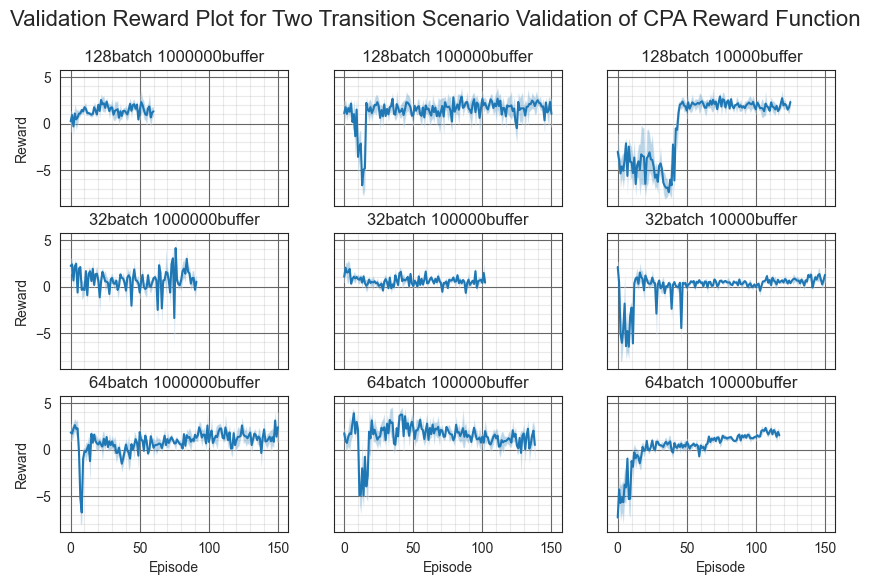

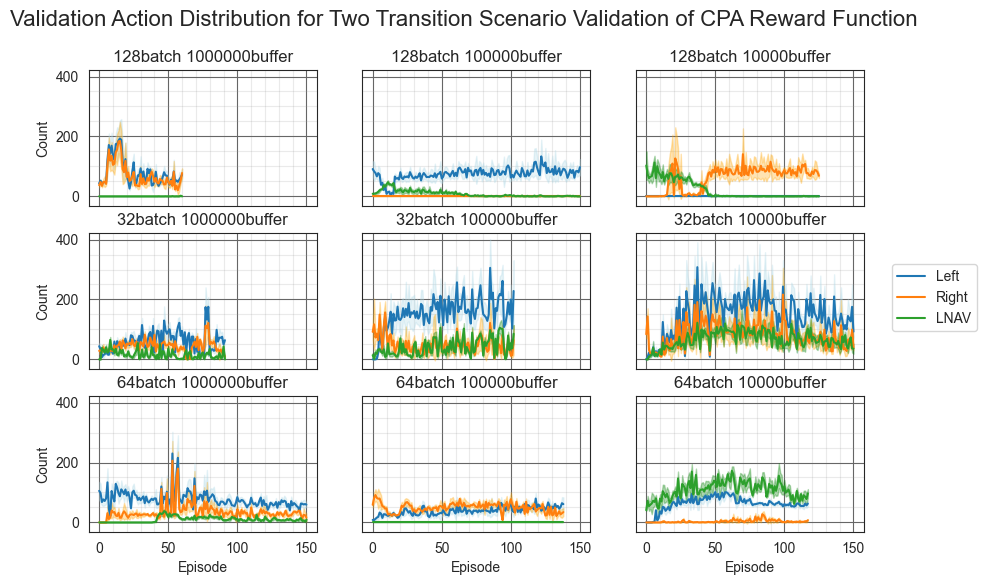

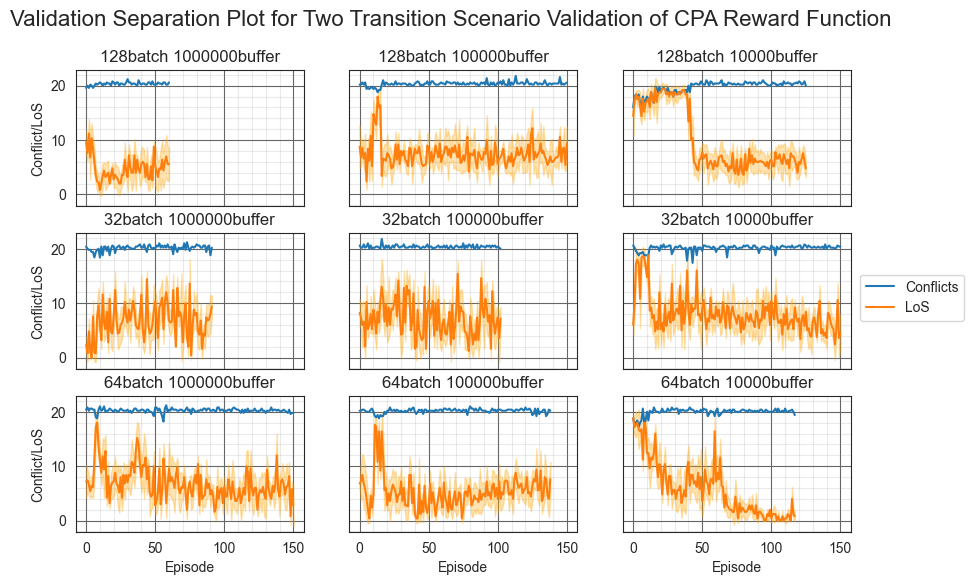

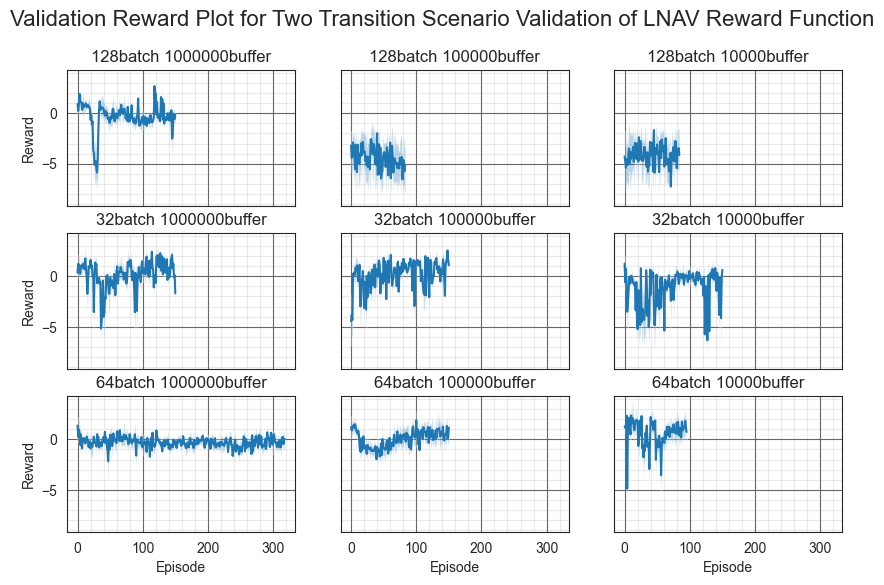

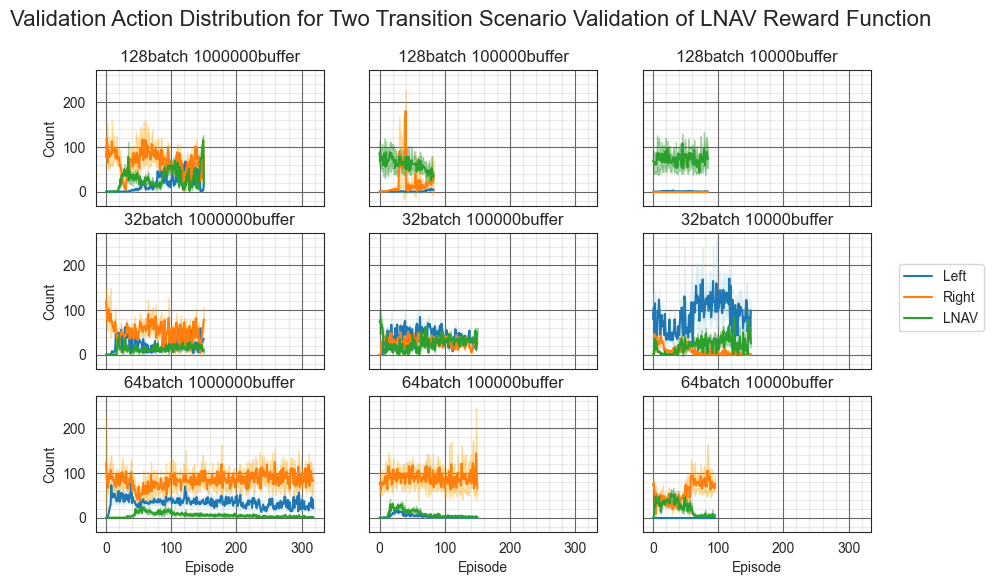

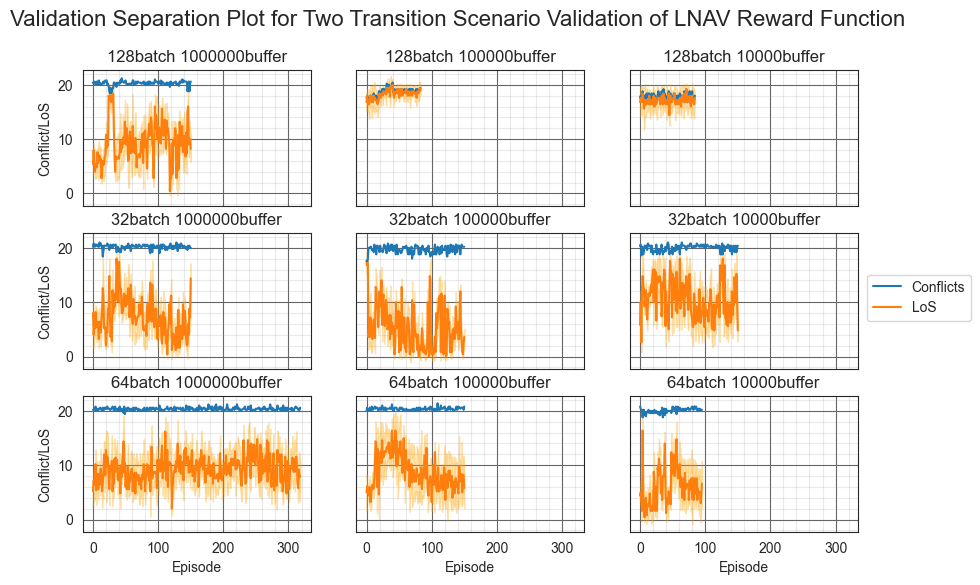

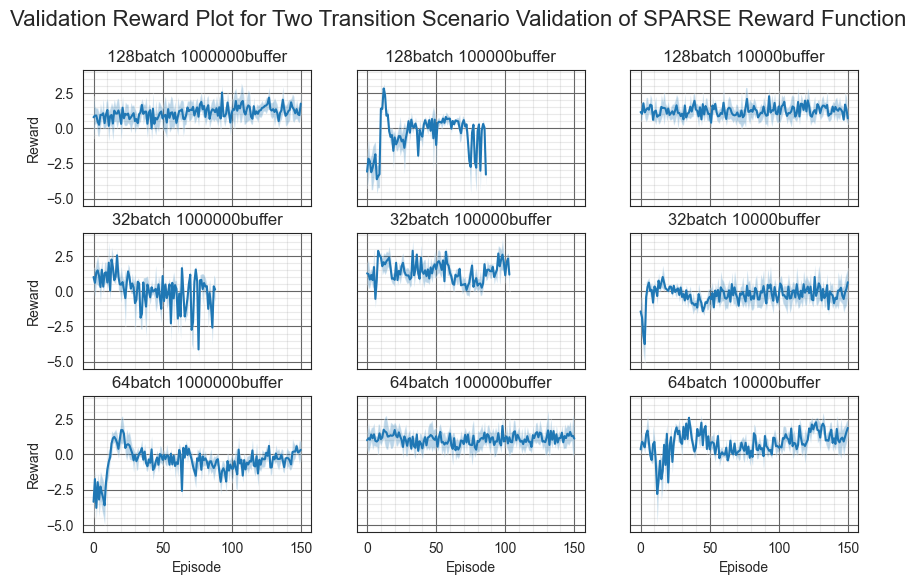

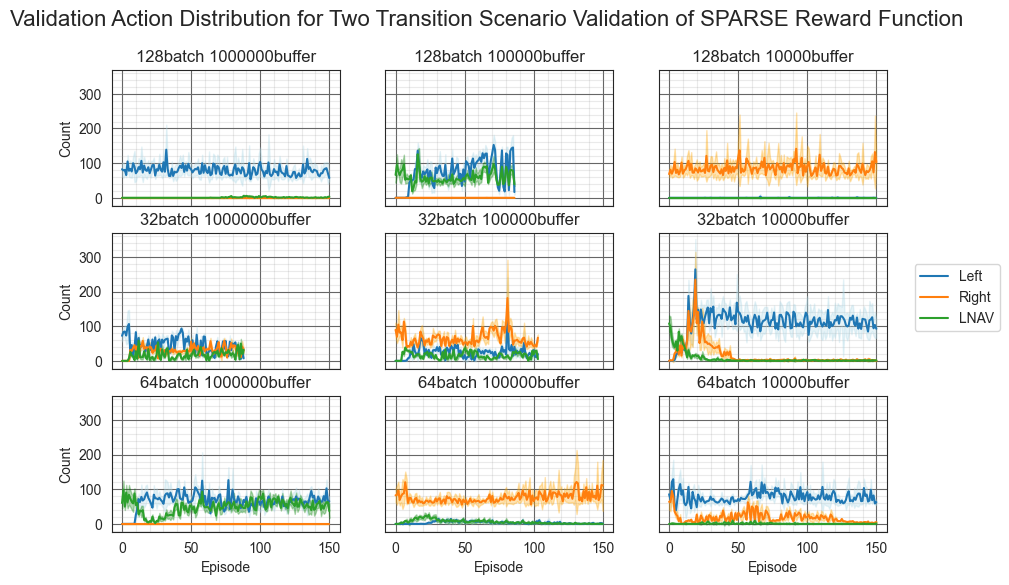

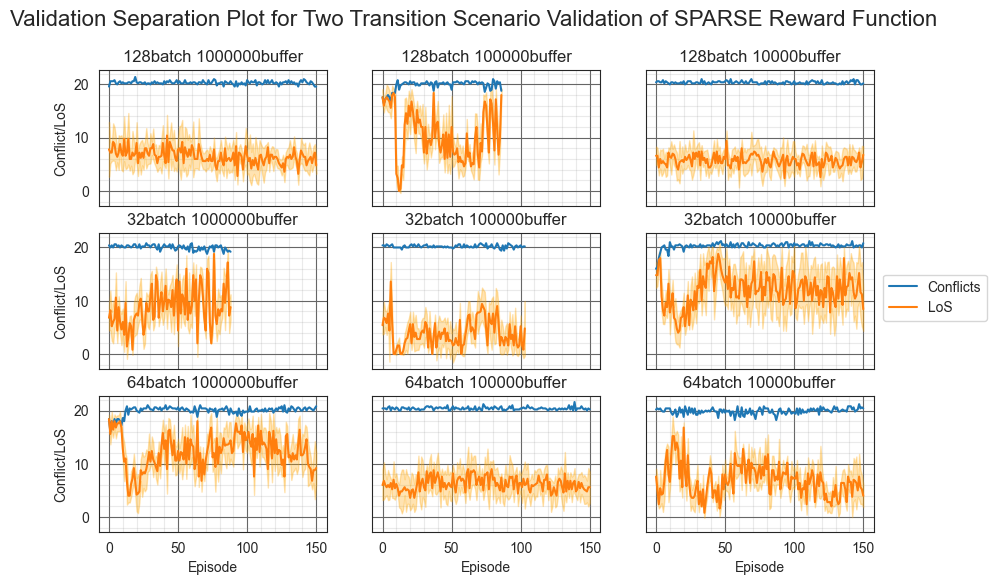

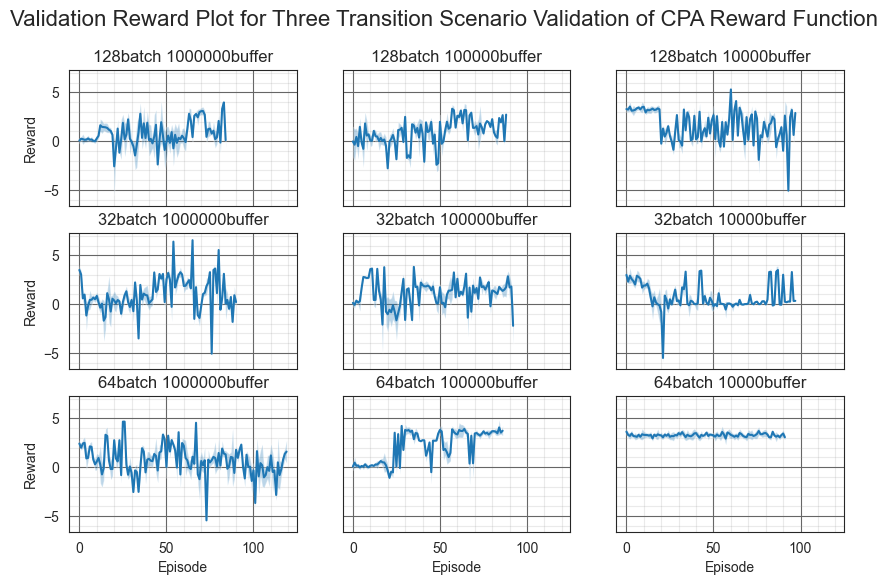

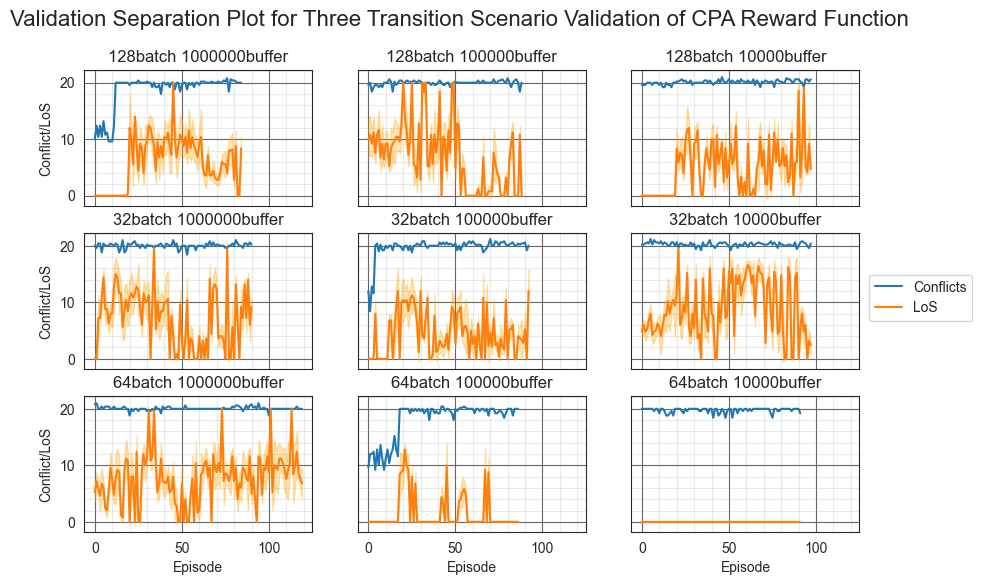

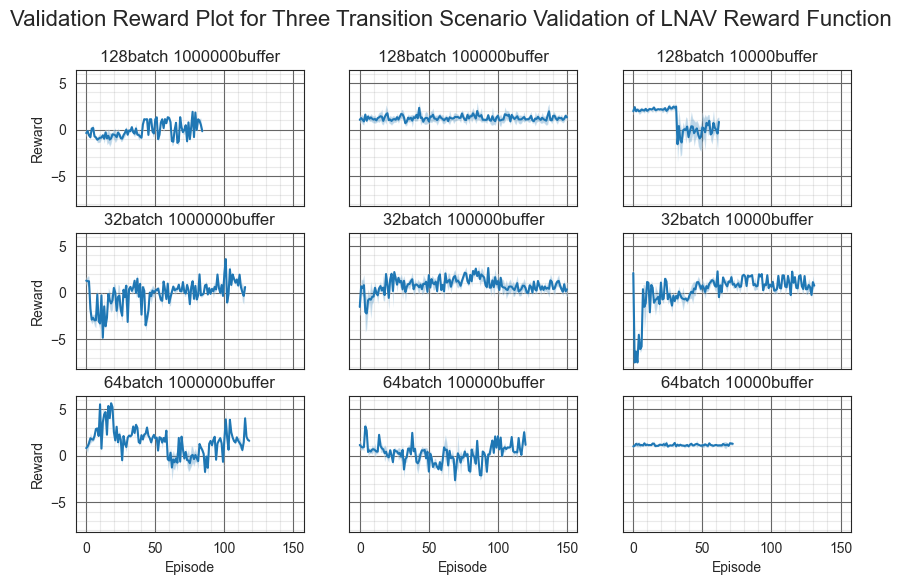

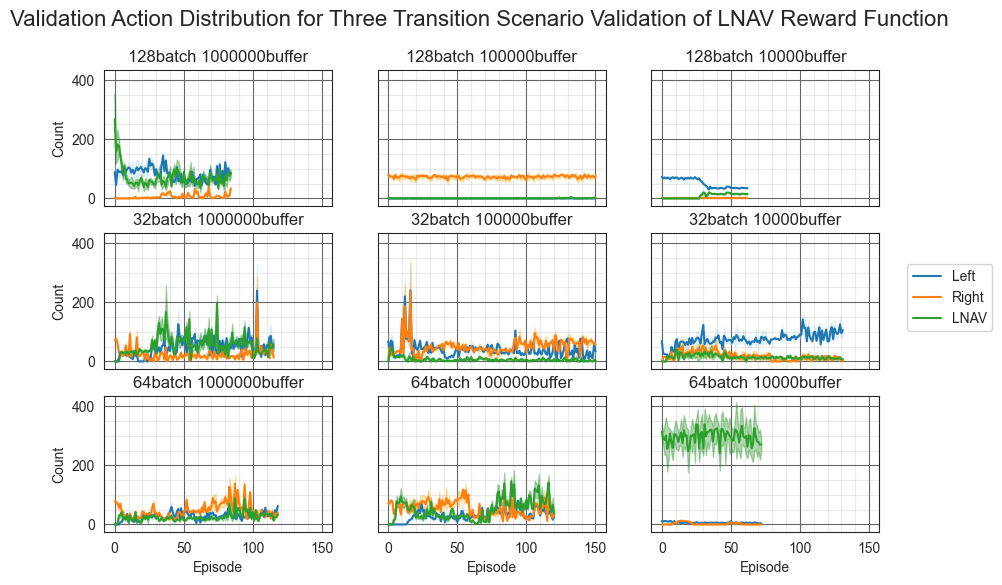

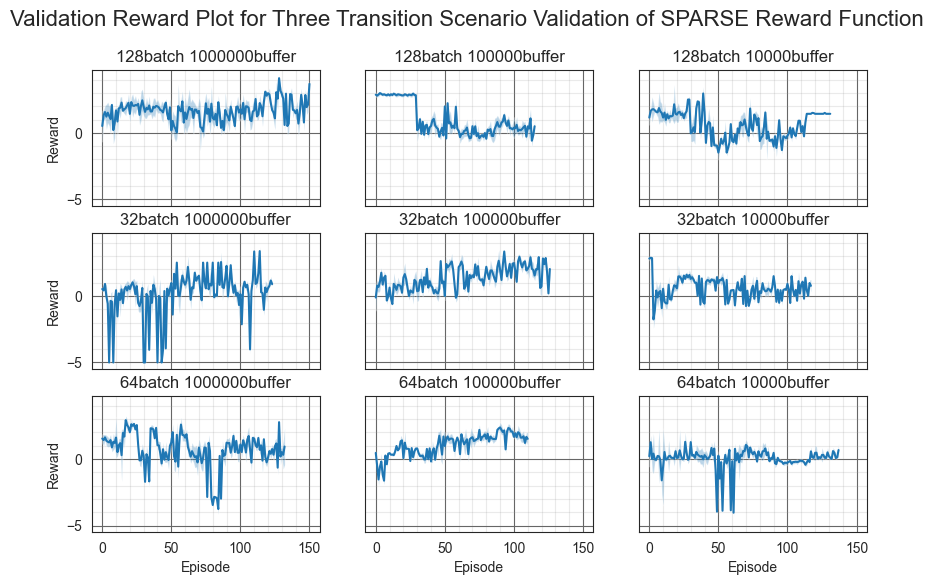

In [12]:
workdir = os.getcwd()
# path = os.path.relpath('..\\..\\..\\results\\validation_results\\complete_experiments_first', workdir)
path = os.path.relpath('..\\..\\..\\results\\validation_results', workdir)

two_cpa = {}
three_cpa = {}
two_lnav = {}
three_lnav = {}
two_sparse = {}
three_sparse = {}

for f in os.listdir(path):
    if os.path.isfile(os.path.join(path, f)):
        x = re.search("\d+batch", f).group()
        y = re.search("\d+buffer", f).group()
        name = x + " " + y
        if "2tran" in f:
            if "CPA" in f:
                two_cpa[name] = read_val_file(f)
            elif "LNAV" in f:
                two_lnav[name] = read_val_file(f)
            elif "SPARSE" in f:
                two_sparse[name] = read_val_file(f)
        elif "3tran" in f:
            if "CPA" in f:
                three_cpa[name] = read_val_file(f)
            elif "LNAV" in f:
                three_lnav[name] = read_val_file(f)
            elif "SPARSE" in f:
                three_sparse[name] = read_val_file(f)

reward_val("Reward Plot for Two Transition Scenario Validation of CPA Reward Function", two_cpa)
action_val("Action Distribution for Two Transition Scenario Validation of CPA Reward Function", two_cpa)
separation_val("Separation Plot for Two Transition Scenario Validation of CPA Reward Function", two_cpa)

reward_val("Reward Plot for Two Transition Scenario Validation of LNAV Reward Function", two_lnav)
action_val("Action Distribution for Two Transition Scenario Validation of LNAV Reward Function", two_lnav)
separation_val("Separation Plot for Two Transition Scenario Validation of LNAV Reward Function", two_lnav)

reward_val("Reward Plot for Two Transition Scenario Validation of SPARSE Reward Function", two_sparse)
action_val("Action Distribution for Two Transition Scenario Validation of SPARSE Reward Function", two_sparse)
separation_val("Separation Plot for Two Transition Scenario Validation of SPARSE Reward Function", two_sparse)

reward_val("Reward Plot for Three Transition Scenario Validation of CPA Reward Function", three_cpa)
action_val("Action Distribution for Three Transition Scenario Validation of CPA Reward Function", three_cpa)
separation_val("Separation Plot for Three Transition Scenario Validation of CPA Reward Function", three_cpa)

reward_val("Reward Plot for Three Transition Scenario Validation of LNAV Reward Function", three_lnav)
action_val("Action Distribution for Three Transition Scenario Validation of LNAV Reward Function", three_lnav)
separation_val("Separation Plot for Three Transition Scenario Validation of LNAV Reward Function", three_lnav)

reward_val("Reward Plot for Three Transition Scenario Validation of SPARSE Reward Function", three_sparse)
action_val("Action Distribution for Three Transition Scenario Validation of SPARSE Reward Function", three_sparse)
separation_val("Separation Plot for Three Transition Scenario Validation of SPARSE Reward Function", three_sparse)

pp.close()